# Reinforcement Learning

Reinforcement Learning is a powerful branch of Machine Learning. It is used to solve interacting problems where the data observed up to time 't' is considered to decide which action to take at time 't + 1'. It is also used for Artificial Intelligence when training machines to perform tasks such as walking. Desired outcomes provide the AI with reward, undesired with punishment. Machines learn through trial and error.

For instance, we can use Reinforcement Learning to tell the Robot Dog how to walk. Every time the dog takes the right step we can give it a reward('1' in Computer Language) and everytime it takes a wrong step then fall down, we can give him the punishment('0' in Computer Language). So by taking random steps like this a dog can learn to walk, so no need for any different algorithm for walking. So the dog learns on his own and repeat the correct steps.

## Multi-Armed Bandit Problem
* The armed bandit is basically a slot machine with the hand to pull on right hand side. The multi-armed bandit problem is you have many slot machines in front of you, so the problem is how you are going to use these multiple slot machines to maximize your return from the number of games your going to play or how do you knwo which ones you will be playing the most to maximize the returns.

* Each one of this machine have distribution behind it, it has distribution of outcomes out of which the machine picks the right result. Basically it tells you whether you win or loose based on the distribution that's built into the machines. The problem here is that you don't know the distribution in the machine, these distribution can be similar or different but by-default they are different. Your goal is to figure out which distribution is the best. 

* If from the distributions D1,D2,D3,D4,D5, the D5 distribution is the best as it has best mean median mode but you don't know about it, so the challenge is how quickly you guess that D5 is the best machine out of all others so as it maximize you profits?

* So the two factors 'exploration' and 'exploitation' are in play, you need to explore the machine to find out which is the best and you need to exploit the machines to make the maximum returns from these machines. Then comes the 'regret', regret is when you are using the non-optimal machine(in our case, all the machines excluding D5). Regret is the difference between the best outcome and the non best outcome. The longer you explore non-optimal machines, the higher the regret. But at the same time if we don't explore much then we can't tell which machine is the best, for say we can think of other specific machine like D4 as the best machine as it also has similar curve and returns like D5, so we start exploiting D4 for the returns but in realtiy D5 is the best one.

* So the goal is finding the best one and then exploiting it but not spending much time in exploring the machines.

**Here we are going to take the Coca-cola advertisement in place of the slot machine**
* For instance, there is a campaign of Coca-cola and they are finding the ads and from those finding the best ad which maximizes the returns. You have to find the best ad while the campaign is going on i.e. explore the ads and find the best in the quickest way and then start exploiting it to gain the maximum returns.

## Upper Confidence Bound
The quick summary of multi-armed bandit problem: 
* We have d arms. For ex arms are ads that we display, eachtime an user comes to the website.
* Each time a user connects to a webpage, that makes a rounds.
* At each round n, we choose one ad to display to the user.
* At each round n, ad 'i' gives a rewards whether its a 0 or 1, r(n) = 1 if user clicks on the ad and r(n) = 0 if the user didn't click on the ad.
* Our goal is to maximize the total reward we get over many rounds.

In UCB we are going to solve this problem by exploring the best ad and then exploiting it to get the maximum returns. We are going to find the best ad that will maximize the clicking of ads by the customers. 

* CTR=Click Through Rate(the dataset consist of CTR), optimize the clicks on the ad of the SUV car. Each column will have different ads and we will predict will ad will convert the most customers to click on the ad. So we ar egoing to show the ad to different users and collect the data if that user clicks on the ad or not. Algorithm will choose the aads to show to the user and if user clicks then 1 is recorded, not clicks then 0 is recorded. Each row corresponds to different user and we have 10k users.
* We are displaying the ad to the user at real time so its a dynamic process in real time, therefore the only way to simulate this is to make 10 real ads right now and make Google AdWord account and show the ads to the real user on the site but this isn't an option.
* So we would create a simulation(we aren't supposed to know all the clicks in the real dataset), and this simulation is given by the dataset. Because in this dataset each row corresponds to the user visiting the webpage and to whom we are going to show the ad and columsn corresponds to each ad. This dataset is a simulation in the sense that each time a user connects to the webpage and the dataset tells us on which ad the user will click on. This is the only way we can give data to the UCB and Thompson Sampling Algorithm.
* We can do this using the Naive Bayes as well but in real time each time we impress an ad on the web site or the google search engine, it incurs a cost to impress ads and therefore we need to figure out the fastest way possible to minimize the number of rounds(as we are showing the ads in rounds, like first round of ads to user1 and then next round of ads to user2) and find out by using the minimum rounds that which ad converts most of the users to click on it. So we need a stronger algorithm like UCB and Thompson sampling instead of simple statstics algorithm.
* We will assume that each column i.e.each ad will have a fixed conversion rate unless they change it over time. Usually an ad that you show online will have a fix conversion rate because it will convert over time the same rate of people.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
print(dataset)   #main aim to get the ad which has the highest click through rate

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]


In [3]:
#implementing UCB algorithm, will implement through the algorithm steps that we have and the ad with highest upper confidence bound will be selected
import math

N = 10000   #total number of users/rounds

d = 10   #number of ads

ad_selected = []   #list of rounds that are selected over the rounds will be added, the last element will be the ad selected at round N.

numbers_of_selections = [0] * d   #N(n), from algo #number of times a particular ad was selected upto round N
#each time we select an ad to show for example Ad3, then the third element of the list(i.e. thrid 0) will be incremented by 1, and at the end we want to see the add that is way maore selected than the others

sum_of_rewards = [0] * d   #R(n), from algo #the accumulated rewards of the particular ad upto round N, ad will get reward if it's clicked

total_rewards = 0   #total reward at each round, with the different ads selected at each round their total will be done

for n in range(0, N):   #iterates through all the "10k customers" 
    ad = 0   #variable for each ad(ad0-ad1)   
    max_upper_bound = 0   #at first it'll be 0 and moving forward if we find greater confidence bound than 0 , then we will add it to this variable, and then each new upper confidence bound will be compared to this max_upper_bound, if new bound is greater then update this max_upper_bound variable
    
    for i in range(0, d):   #iterates through all "10 ads"  #as we need the maximum upper confidence bound, we will need to compare the upper confidence bound of all the ads, so we will iterate through each ad using for loop and get the upper confidence bound of each ad
        
        if numbers_of_selections[i] > 0:   #to check if any ad was selected by us atleast once to show to the user
            average_reward = (sum_of_rewards[i] / numbers_of_selections[i])   #getting the average time the ad was clicked(rewarded)
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])   #log(n+1) because the first round will start from 0 and log(0) is minus infinity so we are starting from n+1 i.e.0+1=1
            upper_bound = average_reward + delta_i   #upper bound of each ads at each round
        
        else:   #what if the ad(variable i) has not been selected yet, so we have to select the ad because numbers_of_selections[i] must not be 0 or else the result(average_reward) of (sum_of_rewards[i] / numbers_of_selections[i]) will be plus infinity the we couldn't compute further calculations
            upper_bound = 1e400   #if ad was not selected then we will have to set upper bound of that particular ad(ad we are dealing in 2nd for loop) to the highest value then that it'll be the maximum upper bound and that ad will be selected
            #in python 1e400 is the super high value 
        
        if(upper_bound > max_upper_bound):   #if new upper_bound is greater than max_upper_bound then update max_upper_bound as said above on line 19
            max_upper_bound = upper_bound   #updating the max_upper_bound as said above on line 19
            ad = i   #for the ad that have not been selected, the upper_bound=1e400 will always be larger than the max_upper_bound, so that particular ad with upper_bound=1e400 will be selected as the best ad, so here the ad=i(selecting the ad that has not been selected)
    
    ad_selected.append(ad)   #update the ads_selected variable with the all newly selected ads(variable ad) in the 2nd for loop
    numbers_of_selections[ad] += 1  #taking the index of variable "ad"(the ad that was just selected) and updating it inside the numbers_of_selections list, so to update that list with newly selected ad we have to increment it by 1(as index starts from 0 but actually we have to increment by 1 to get to perfect position of that newly selected ad)
    
    reward = dataset.values[n, ad]   #reward collected after showing this particular ad(variable "ad") to the each user "n" i.e.reward of each user is collected and stored
    
    sum_of_rewards[ad] += reward   #appending above rewards of each ad collected by the variable "reward" in the list and appending according to the particular ads i.e.list of AD1, then list of AD2 and  so on... 
    total_rewards = total_rewards + reward   #accumulated reward of each ad separately

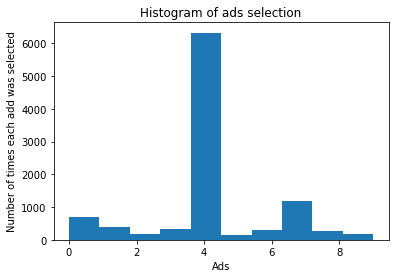

In [4]:
#visualising the results

plt.hist(ad_selected)   #all the ads that were selected by every user 
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each add was selected')
plt.show()